In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [4]:
import librosa
import librosa.display
import IPython.display as ipd

In [5]:
df = pd.read_csv("D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\metadata\\UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [6]:
class_name = ["air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling", "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"]

In [7]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

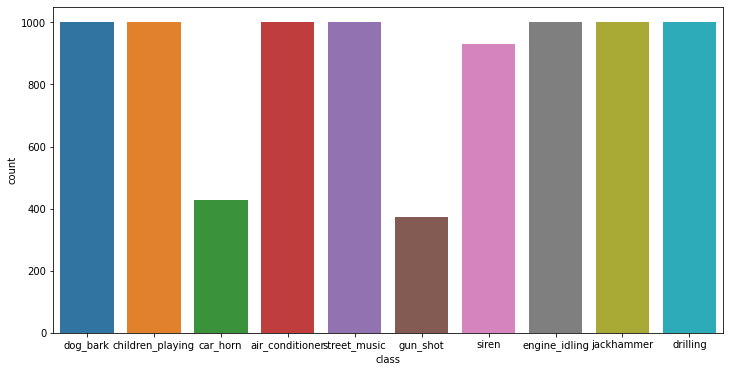

In [8]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="class", data=df)
plt.show()

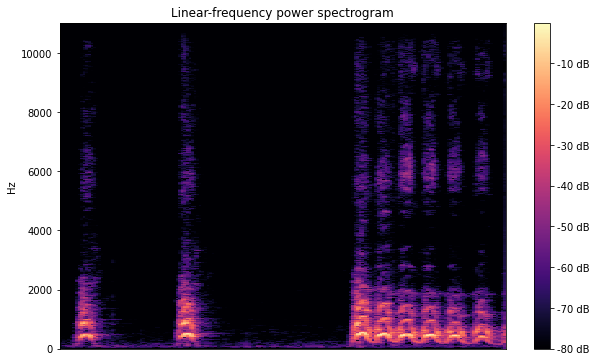

In [9]:
audio_file_path='D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold1\\101415-3-0-2.wav'

data, sr = librosa.load(audio_file_path)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

ipd.Audio(audio_file_path)

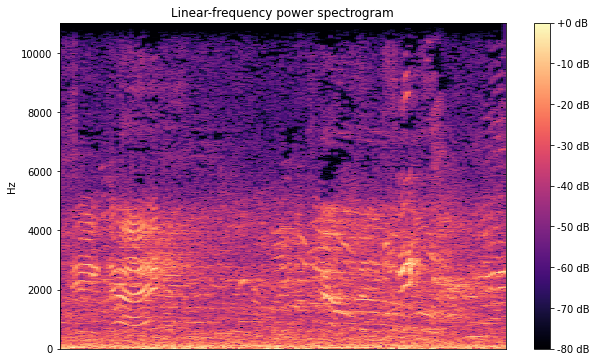

In [10]:
audio_file_path = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav'

data, sr = librosa.load(audio_file_path)
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

ipd.Audio(audio_file_path)

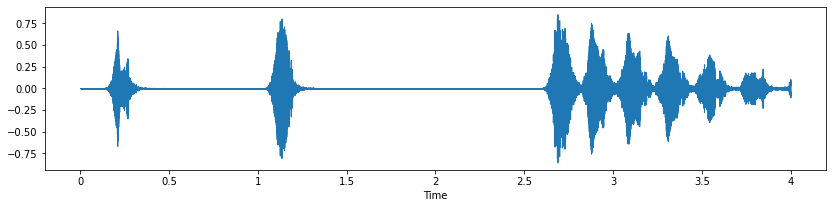

In [11]:
audio_file_path = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold1\\101415-3-0-2.wav'

plt.figure(figsize=(14,3))
data, sr = librosa.load(audio_file_path)
librosa.display.waveshow(data, sr = sr)
ipd.Audio(audio_file_path)

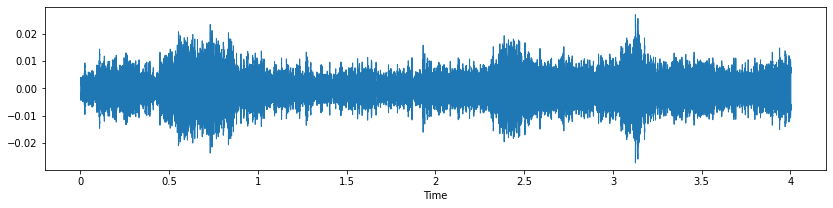

In [12]:
audio_file_path = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold5\\100263-2-0-117.wav'

#let's view the waveplot 
plt.figure(figsize=(14,3))
data, sr = librosa.load(audio_file_path)
librosa.display.waveshow(data, sr = sr)
ipd.Audio(audio_file_path)

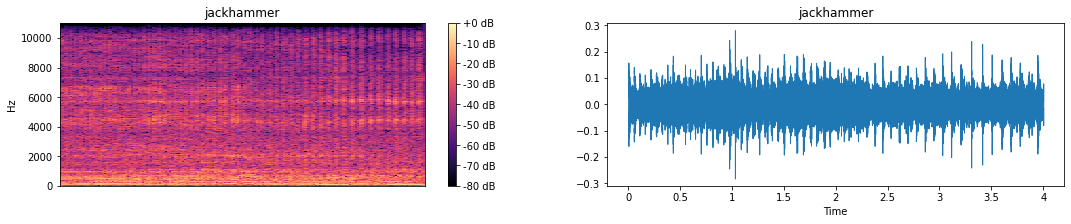

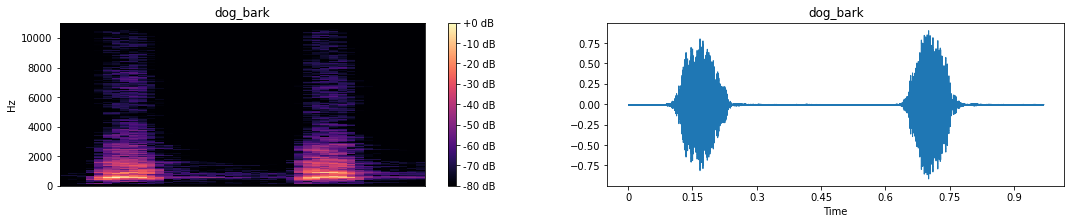

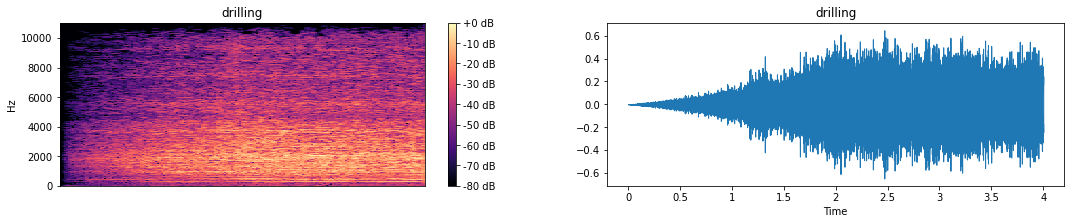

In [13]:
for i in range(192, 197, 2):
    audio_file_path = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    
    data, sr = librosa.load(audio_file_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    
    plt.figure(figsize=(18, 3))
    
    plt.subplot(1, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(df["class"][i])
    
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(data, sr = sr)
    plt.title(df["class"][i])

In [14]:
data, sr = librosa.load('D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold5\\100032-3-0-0.wav')
arr = librosa.feature.melspectrogram(y = data, sr = sr)
arr.shape

(128, 14)

In [15]:
features = []
labels = []

def parser():
    # Function to load files and extract features
    for i in range(df.shape[0]):
        file_name = 'D:\\Project Working\\UrbanSound8k\\UrbanSound8K\\audio\\fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
        # Here kaiser_fast is a technique used for faster extraction
        data, sr = librosa.load(file_name, res_type='kaiser_fast') 
        mels = np.mean(librosa.feature.melspectrogram(y = data, sr = sr), axis=1)        
        features.append(mels)
        labels.append(df["classID"][i])

    return features, labels

In [ ]:
x, y = parser()

C:\Pythondj\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


In [ ]:
X = np.array(x)
Y = np.array(y)

print(X.shape)
print(Y.shape)

In [ ]:
print(X.dtype)
print(Y.dtype)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot = True, linewidths = 2, fmt="d", 
            xticklabels = class_name,
            yticklabels = class_name)
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
pred_prob = svc.predict_prob(X_test)